# How

- I joined a free class in [GSX](https://www.genshuixue.com/) and the class started from May 16th - May 18th.
- I followed the Appendex I from [Muddy Water Reserach Report](https://www.muddywatersresearch.com/research/gsx/mw-is-short-gsx/) and download message log file.
- I unzipped it into `all.json`.
- This class started at `05.17 19:40 - 20:20`

In [20]:
DATA_ROOT_PATH = '/src/data/gsx/6004241052266238'
FILENAME = 'all.json'

In [21]:
import numpy as np
import math
import os.path
import json
import time

In [22]:
with open(os.path.join(DATA_ROOT_PATH, FILENAME)) as jsonFile:
    msgLog = json.load(jsonFile)

In [23]:
# extract id and joinTime from the 'from' field
loginDict = dict()
for item in msgLog:
    userInfo = item.get('from')
    if userInfo is not None and userInfo.get('joinTime') is not None:
        loginDict[userInfo.get('id')] = userInfo.get('joinTime')

In [24]:
# The dictioanry with user ID as key and joinTime as value.
print(loginDict)

{'355733440': 1589712059, '355733695': 1589712223, '355733698': 1589712220, '355733701': 1589712221, '355733791': 1589712275, '355733887': 1589712328, '355733935': 1589712343, '355733941': 1589712352, '355734334': 1589712582, '355734301': 1589712554, '355734331': 1589712575, '355734709': 1589712775, '355734880': 1589712845, '355734760': 1589712799, '355734976': 1589712895, '355734994': 1589712913, '355735306': 1589713059, '355735717': 1589713209, '355735684': 1589713195, '355735348': 1589713069, '355736809': 1589713484, '355736104': 1589713298, '355736863': 1589713508, '355735384': 1589713081, '355736917': 1589713516, '355735465': 1589713115, '355737394': 1589713657, '355737280': 1589713628, '355737610': 1589713719, '355737817': 1589713781, '355737700': 1589713744, '355737838': 1589713785, '355738429': 1589713943, '355738438': 1589713945, '355738627': 1589713995, '355738993': 1589714096, '355738303': 1589713913, '355739299': 1589714166, '355736518': 1589713396, '355734070': 1589712421,

In [25]:
print(len(loginDict))

294


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

x = loginDict.keys()
y = loginDict.values()
y_np = np.array(list(y), dtype=np.int32)
from scipy import stats
stats.describe(y_np)


DescribeResult(nobs=294, minmax=(1589712059, 1589725594), mean=1589716398.972789, variance=9014591.835434517, skewness=1.1294539619822457, kurtosis=0.8573833715707186)

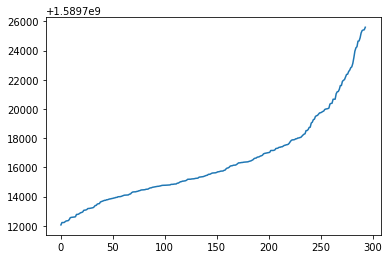

In [27]:
y_np_sorted = np.sort(y_np)
plt.plot(y_np_sorted)

In [28]:
print(y_np_sorted)

[1589712059 1589712220 1589712221 1589712223 1589712275 1589712328
 1589712343 1589712352 1589712421 1589712554 1589712575 1589712582
 1589712589 1589712602 1589712619 1589712775 1589712779 1589712799
 1589712845 1589712895 1589712913 1589712948 1589713059 1589713069
 1589713081 1589713115 1589713183 1589713184 1589713195 1589713209
 1589713228 1589713241 1589713298 1589713387 1589713396 1589713484
 1589713508 1589713516 1589713628 1589713657 1589713692 1589713719
 1589713742 1589713744 1589713781 1589713785 1589713815 1589713836
 1589713846 1589713866 1589713878 1589713901 1589713913 1589713943
 1589713945 1589713987 1589713992 1589713995 1589714011 1589714035
 1589714067 1589714094 1589714096 1589714105 1589714107 1589714115
 1589714166 1589714179 1589714261 1589714308 1589714320 1589714320
 1589714327 1589714350 1589714362 1589714395 1589714407 1589714443
 1589714457 1589714458 1589714467 1589714474 1589714502 1589714503
 1589714516 1589714564 1589714593 1589714599 1589714632 158971

In [29]:
firstDiff = np.diff(y_np_sorted)
# first difference in seconds
print(firstDiff)

[161   1   2  52  53  15   9  69 133  21   7   7  13  17 156   4  20  46
  50  18  35 111  10  12  34  68   1  11  14  19  13  57  89   9  88  24
   8 112  29  35  27  23   2  37   4  30  21  10  20  12  23  12  30   2
  42   5   3  16  24  32  27   2   9   2   8  51  13  82  47  12   0   7
  23  12  33  12  36  14   1   9   7  28   1  13  48  29   6  33  14  11
  23  13   7   4  13  18  25  10   1   0   7   6   9   2   2  37   3   3
  15   1   8  53   5  42  47  12  31   5  14  11  37  62   1   0   8  15
   3   8  16  17   2  14  61   9   6   6  17  27  32  23  16  59   1  21
  46  22   4   6   6  28  38   4  24  19   1   8  43  17  87  53  11  47
  78  18   9  31   2   8  35  57  60   1  14  10   5  17   6   6   4   9
  27  18  23  41  38  75  28   9  61   9  20  48  17  36  93  32  14  15
  18   5  22 127   0   1   8  35  96   4  23  51   2  31   2  48  46  17
  26  12  32  86 108  75  26   2  17  50   6  48   6  28  15  82  72  61
  28 218   4  67 148  15 286  54 175  30 188  50  2

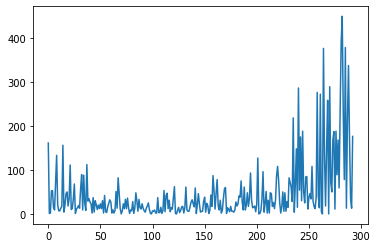

In [30]:
plt.plot(firstDiff)

In [31]:
y_np_min = np.min(y_np)
y_np_max = np.max(y_np)
print("min:%d, max:%d" % (y_np_min, y_np_max))

min:1589712059, max:1589725594


In [32]:
from datetime import datetime as dt
import time
from datetime import tzinfo as tz
from datetime import timezone 
from datetime import timedelta

UTC0800=timezone(+timedelta(hours=8, minutes=0))

def get_datetime_utc0800(timestamp):
    return dt.fromtimestamp(timestamp, tz=UTC0800)

In [33]:
# print sorted login time
for y in y_np_sorted:
    print(get_datetime_utc0800(y))

2020-05-17 18:40:59+08:00
2020-05-17 18:43:40+08:00
2020-05-17 18:43:41+08:00
2020-05-17 18:43:43+08:00
2020-05-17 18:44:35+08:00
2020-05-17 18:45:28+08:00
2020-05-17 18:45:43+08:00
2020-05-17 18:45:52+08:00
2020-05-17 18:47:01+08:00
2020-05-17 18:49:14+08:00
2020-05-17 18:49:35+08:00
2020-05-17 18:49:42+08:00
2020-05-17 18:49:49+08:00
2020-05-17 18:50:02+08:00
2020-05-17 18:50:19+08:00
2020-05-17 18:52:55+08:00
2020-05-17 18:52:59+08:00
2020-05-17 18:53:19+08:00
2020-05-17 18:54:05+08:00
2020-05-17 18:54:55+08:00
2020-05-17 18:55:13+08:00
2020-05-17 18:55:48+08:00
2020-05-17 18:57:39+08:00
2020-05-17 18:57:49+08:00
2020-05-17 18:58:01+08:00
2020-05-17 18:58:35+08:00
2020-05-17 18:59:43+08:00
2020-05-17 18:59:44+08:00
2020-05-17 18:59:55+08:00
2020-05-17 19:00:09+08:00
2020-05-17 19:00:28+08:00
2020-05-17 19:00:41+08:00
2020-05-17 19:01:38+08:00
2020-05-17 19:03:07+08:00
2020-05-17 19:03:16+08:00
2020-05-17 19:04:44+08:00
2020-05-17 19:05:08+08:00
2020-05-17 19:05:16+08:00
2020-05-17 1

## Find the Precise Joiner

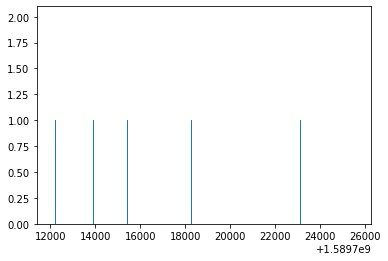

In [34]:
# I bucketed loginTime by 329 bins. It is more than enough.
n, bins, patches = plt.hist(y_np_sorted, range(y_np_min, y_np_max))

In [35]:
print(n)
print(len(n))
print(bins)
print(len(bins))
print(patches)

[1. 0. 0. ... 0. 0. 0.]
13534
[1589712059 1589712060 1589712061 ... 1589725591 1589725592 1589725593]
13535
<a list of 13534 Patch objects>


In [36]:
n_indexes = list()

for index in range(len(n)):
    if n[index] > 1:
        n_indexes.append(index)
print(n_indexes)

[2261, 2712, 3125, 5096, 8609, 9542]


In [37]:
len(n_indexes)

6

In [38]:
duplicate_logintime = np.asarray(bins[n_indexes])

In [39]:
duplicate_logintime_ids = list()
for logintime in duplicate_logintime:
    for k, v in loginDict.items():
        if v == logintime:
            duplicate_logintime_ids.append(k)

In [40]:
print(duplicate_logintime)
print(len(duplicate_logintime))

[1589714320 1589714771 1589715184 1589717155 1589720668 1589721601]
6


In [41]:
print(duplicate_logintime_ids)
print(len(duplicate_logintime_ids))

['355739992', '355740016', '355742641', '355742623', '355746598', '355746580', '355778296', '355778278', '355810315', '355810312', '355816282', '355816291']
12


In [42]:
# the odd that they login at the same time
1/abs(y_np_min - y_np_max)

7.388252678241596e-05

In [43]:
for id in duplicate_logintime_ids:
    print('ID: %s, Login Time: %s' % (id, get_datetime_utc0800(loginDict[id])))

ID: 355739992, Login Time: 2020-05-17 19:18:40+08:00
ID: 355740016, Login Time: 2020-05-17 19:18:40+08:00
ID: 355742641, Login Time: 2020-05-17 19:26:11+08:00
ID: 355742623, Login Time: 2020-05-17 19:26:11+08:00
ID: 355746598, Login Time: 2020-05-17 19:33:04+08:00
ID: 355746580, Login Time: 2020-05-17 19:33:04+08:00
ID: 355778296, Login Time: 2020-05-17 20:05:55+08:00
ID: 355778278, Login Time: 2020-05-17 20:05:55+08:00
ID: 355810315, Login Time: 2020-05-17 21:04:28+08:00
ID: 355810312, Login Time: 2020-05-17 21:04:28+08:00
ID: 355816282, Login Time: 2020-05-17 21:20:01+08:00
ID: 355816291, Login Time: 2020-05-17 21:20:01+08:00
